# I made a monthly dataset for a class to work with
 - plotted timeseries
 - big odd drop in t2m in April 1983.  
 - thought there was a delayed response to El Chichon 9/1982 eruption
 - investigating here
 
 ## Results
 - all bad data 4/21 - 4/30  1983
 - really odd data 4/10 - 4/21 near Antarctica


In [1]:
#read in era5 catalog
import numpy as np
import xarray as xr
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml")
#list(cat)
ds  = cat["era5_hourly_reanalysis_single_levels_sa"].to_dask()
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 350640)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    e          (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ptype      (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ro         (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    sd         (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    sro        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ssr        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tcrw       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tsn        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

In [2]:
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()
cluster.adapt(minimum=1, maximum=70)
cluster

In [29]:
dy = ds.sel(time=slice('1983-04-10','1983-05-15')).resample(time='1D').mean(keep_attrs=True)
dy

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 36)
Coordinates:
  * time       (time) datetime64[ns] 1983-04-10 1983-04-11 ... 1983-05-15
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    e          (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ptype      (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ro         (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    sd         (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    sro        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    ssr        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tcrw       (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tsn        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

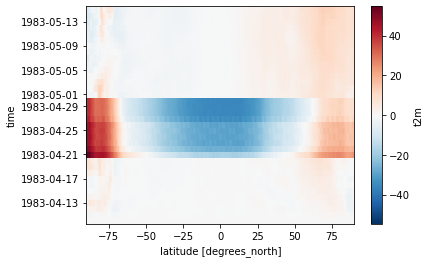

In [30]:
dif = dy-dy.sel(time='1983-04-10')
dif.t2m.mean('longitude').plot()

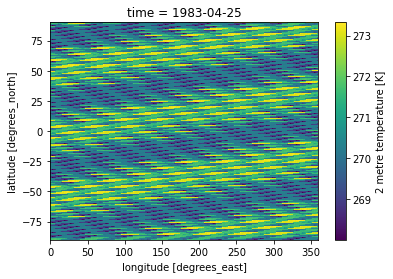

In [31]:
dy.t2m.sel(time='1983-04-25').plot()

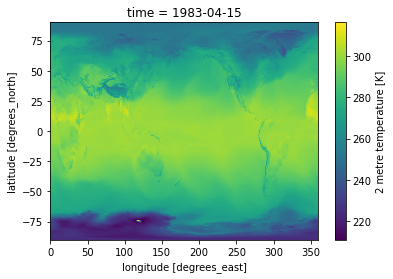

In [32]:
dy.t2m.sel(time='1983-04-15').plot()

In [33]:
bad = dy.t2m.sel(time='1983-04-25').load()

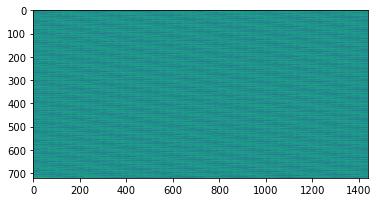

In [34]:
import matplotlib.pyplot as plt
plt.imshow(bad.data)

## example of the bad data over antarctica

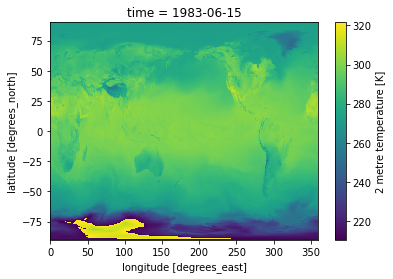

In [42]:
ds.t2m.sel(time='1983-06-15T00').plot()

# look in time at bad point to see when present

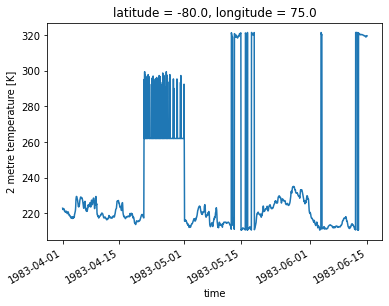

In [47]:
ds.t2m.sel(longitude=75,latitude=-80,method='nearest').sel(time=slice('1983-04-01T00','1983-06-15T00')).plot()

_call non-retriable exception: 
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/gcsfs/core.py", line 507, in _call
    self.validate_response(status, contents, json, path, headers)
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/gcsfs/core.py", line 1230, in validate_response
    raise HttpError({"code": status})
gcsfs.utils.HttpError


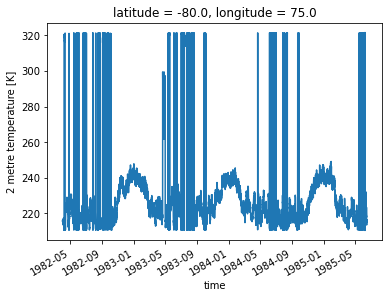

In [48]:
ds.t2m.sel(longitude=75,latitude=-80,method='nearest').sel(time=slice('1982-04-01T00','1985-06-15T00')).plot()

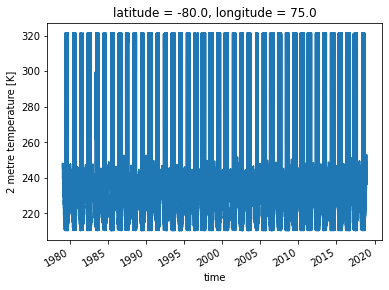

In [49]:
#explore how often these bad data happen in the dataset by plotting timeseries
ds.t2m.sel(longitude=75,latitude=-80,method='nearest').plot()

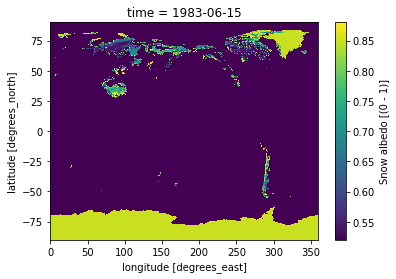

asn


Press Enter to continue... 


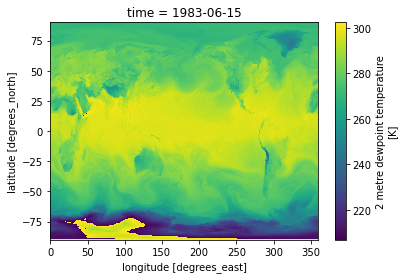

d2m


Press Enter to continue... 


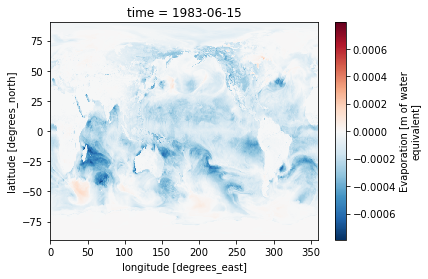

e


Press Enter to continue... 


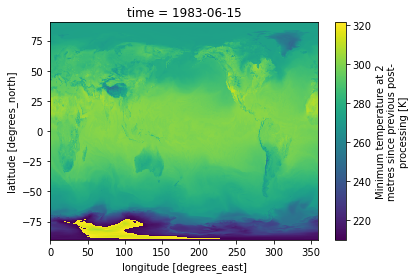

mn2t


Press Enter to continue... 


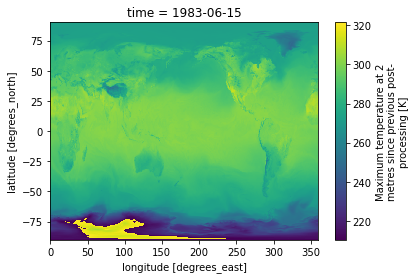

mx2t


Press Enter to continue... 


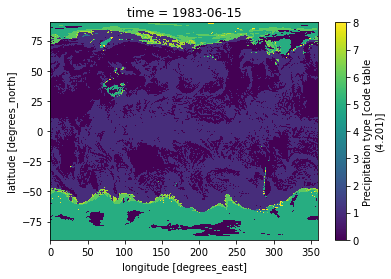

ptype


Press Enter to continue... 


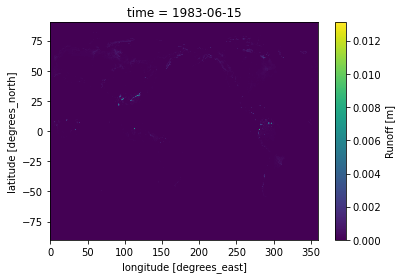

ro


Press Enter to continue... 


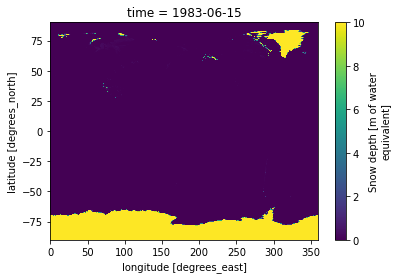

sd


Press Enter to continue... 


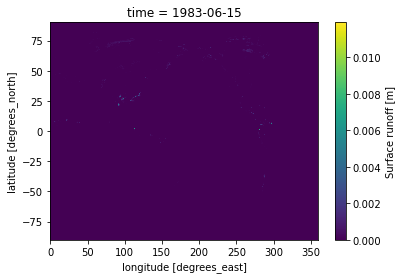

sro


Press Enter to continue... 


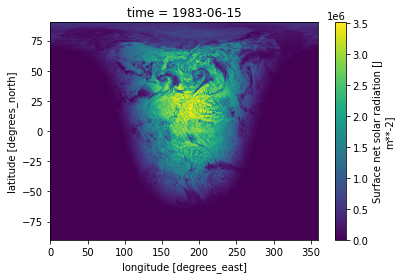

ssr


Press Enter to continue... 


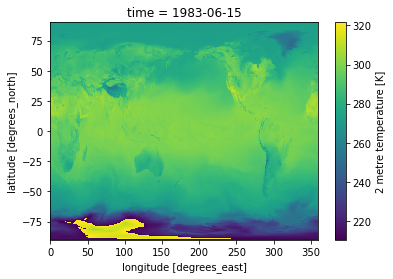

t2m


Press Enter to continue... 


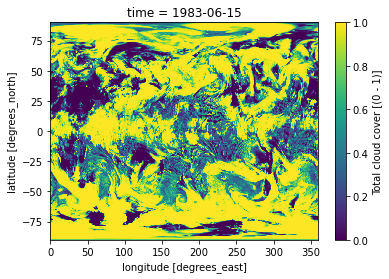

tcc


Press Enter to continue... 


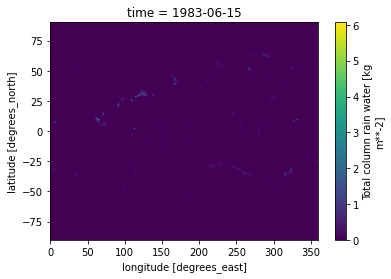

tcrw


Press Enter to continue... 


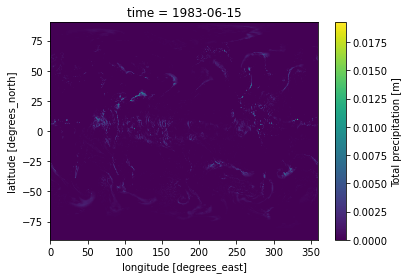

tp


Press Enter to continue... 


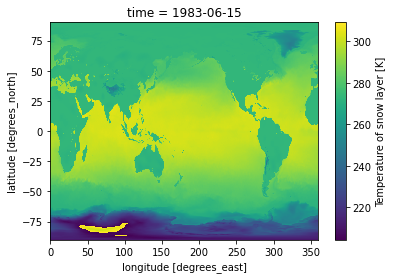

tsn


Press Enter to continue... 


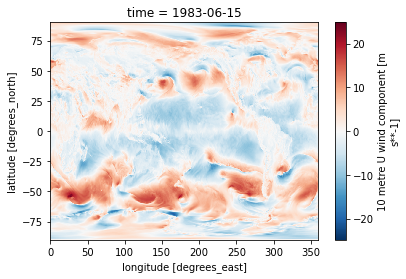

u10


Press Enter to continue... 


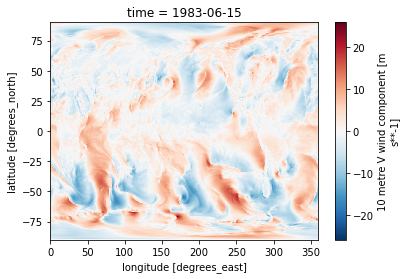

v10


Press Enter to continue... 


In [55]:
# look to see if issue shows up in any other variable:
for var in ds:
    ds[var].sel(time='1983-06-15T00').plot()
    plt.show()
    print(var)
    input("Press Enter to continue...")